In [59]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import random

import sklearn as sk

# Preparation

## Load Data

### Essen Folksong Collection

Contains 9000+ melodies as lists of intervals and lists of pitches.

In [19]:
# read data

data_essen = pd.read_csv('Essen_folksong_collection.csv', index_col=0, sep='\t')

data_essen.head()

,region,title,key,DGIs,spelled_pitches
0,africa,Muwaschah Lamma Bada,g minor,"['P4', 'M2', 'm2', 'M2', 'M-2', 'P1', 'm-2', '...","['D5', 'G5', 'A5', 'B-5', 'C6', 'B-5', 'B-5', ..."
1,mexico,CUCA 1,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."
2,mexico,CUCA 2,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."
3,mexico,CUCA 1,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."
4,mexico,CUCA 2,F major,"['P1', 'P1', 'P4', 'M3', 'M-6', 'P1', 'P1', 'P...","['C4', 'C4', 'C4', 'F4', 'A4', 'C4', 'C4', 'C4..."


In [66]:
# split and strip intervals

sequences_essen_int = [
    np.array([ interval.strip( '\"[\',\]' ) for interval in row.DGIs.split() ])
    for (i, row) in data_essen.iterrows()
]

sequences_essen_int[0]

array(['P4', 'M2', 'm2', 'M2', 'M-2', 'P1', 'm-2', 'P1', 'M-2', 'P1',
       'm-2', 'm2', 'M2', 'm2', 'M2', 'M2', 'M-3', 'm-2', 'P1', 'M-2',
       'P1', 'm-2', 'm2', 'M2', 'M-2', 'm-2', 'm2', 'M-3', 'm-2', 'm2',
       'm-2', 'm2', 'A2', 'M-3', 'm2', 'm-2', 'M-2', 'M2', 'M-3', 'm-2',
       'P1', 'P1', 'M-2', 'P1', 'm-2', 'm2', 'P5', 'P4', 'M2', 'm2', 'M2',
       'M-2', 'P1', 'm-2', 'P1', 'M-2', 'P1', 'm-2', 'm2', 'P-4', 'P4',
       'M2', 'm2', 'P1', 'm-2', 'm3', 'M-2', 'm-3', 'P5', 'M-2', 'P1',
       'M-2', 'P1', 'm-2', 'P1', 'M-2', 'P1', 'M-2', 'M2', 'M2', 'm2',
       'P-4', 'M2', 'M2', 'm2', 'P1', 'm-2', 'm3', 'M-2', 'm-2', 'm2',
       'M2', 'M2', 'M-3', 'm-2', 'P1', 'M-2', 'P1', 'm-2', 'm2', 'M2',
       'M-2', 'm-2', 'm2', 'm-2', 'M-2', 'd1', 'm-2', 'm2', 'm-2', 'm2',
       'A2', 'M-3', 'm2', 'm-2', 'M-2', 'M2', 'M-3', 'm-2', 'P1', 'M-2',
       'P1', 'm-2', 'm2', 'M2', 'm2', 'M2', 'M2', 'M-3', 'm-2', 'P1',
       'M-2', 'P1', 'm-2', 'm2'], dtype='<U3')

In [67]:
# split and strip pitches

sequences_essen_pitch = [
    np.array([ pitch.strip( '\"[\',\]' ) for pitch in row.spelled_pitches.split() ])
    for (i, row) in data_essen.iterrows()
]

sequences_essen_pitch[0]

array(['D5', 'G5', 'A5', 'B-5', 'C6', 'B-5', 'B-5', 'A5', 'A5', 'G5',
       'G5', 'F#5', 'G5', 'A5', 'B-5', 'C6', 'D6', 'B-5', 'A5', 'A5',
       'G5', 'G5', 'F#5', 'G5', 'A5', 'G5', 'F#5', 'G5', 'E-5', 'D5',
       'E-5', 'D5', 'E-5', 'F#5', 'D5', 'E-5', 'D5', 'C5', 'D5', 'B-4',
       'A4', 'A4', 'A4', 'G4', 'G4', 'F#4', 'G4', 'D5', 'G5', 'A5', 'B-5',
       'C6', 'B-5', 'B-5', 'A5', 'A5', 'G5', 'G5', 'F#5', 'G5', 'D5',
       'G5', 'A5', 'B-5', 'B-5', 'A5', 'C6', 'B-5', 'G5', 'D6', 'C6',
       'C6', 'B-5', 'B-5', 'A5', 'A5', 'G5', 'G5', 'F5', 'G5', 'A5',
       'B-5', 'F5', 'G5', 'A5', 'B-5', 'B-5', 'A5', 'C6', 'B-5', 'A5',
       'B-5', 'C6', 'D6', 'B-5', 'A5', 'A5', 'G5', 'G5', 'F#5', 'G5',
       'A5', 'G5', 'F#5', 'G5', 'F#5', 'E5', 'E-5', 'D5', 'E-5', 'D5',
       'E-5', 'F#5', 'D5', 'E-5', 'D5', 'C5', 'D5', 'B-4', 'A4', 'A4',
       'G4', 'G4', 'F#4', 'G4', 'A4', 'B-4', 'C5', 'D5', 'B-4', 'A4',
       'A4', 'G4', 'G4', 'F#4'], dtype='<U3')

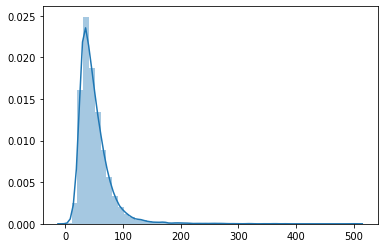

In [87]:
sns.distplot(np.fromiter(map(len,sequences_essen_int), int))

In [122]:
# read chord data

data_chords = pd.read_csv('chord_list.tsv', sep='\t')

data_chords

,id,chord_id,mc,mn,onset,chords,chord,key,pedal,numeral,...,relativeroot,phraseend,globalkey,bass_step,mc_next,onset_next,next_chord_id,chord_length,globalminor,localminor
0,0,0,0,1,0,.A.I,I,I,NaN,I,...,NaN,NaN,A,1,0,3/8,1.0,3/8,False,False
1,0,1,0,1,3/8,V7,V7,I,NaN,V,...,NaN,NaN,A,5,0,3/4,2.0,3/8,False,False
2,0,2,0,1,3/4,I,I,I,NaN,I,...,NaN,NaN,A,1,0,9/8,3.0,3/8,False,False
3,0,3,0,1,9/8,V7,V7,I,NaN,V,...,NaN,NaN,A,5,1,0,4.0,3/8,False,False
4,0,4,1,2,0,I,I,I,NaN,I,...,NaN,NaN,A,1,1,3/8,5.0,3/8,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142506,696,160058,280,281,1/2,I,I,I,NaN,I,...,NaN,NaN,f,1,280,3/4,160059.0,1/4,True,False
142507,696,160059,280,281,3/4,I6,I6,I,NaN,I,...,NaN,NaN,f,3,281,0,160060.0,1/4,True,False
142508,696,160060,281,282,0,V(64),V(64),I,NaN,V,...,NaN,NaN,f,5,281,1/2,160061.0,1/2,True,False
142509,696,160061,281,282,1/2,V7,V7,I,NaN,V,...,NaN,NaN,f,5,282,0,160062.0,1/2,True,False


In [127]:
sequences_chords = [np.array(piece["chord"]) for name, piece in data_chords.groupby("id")]
sequences_chords[0]

array(['I', 'V7', 'I', 'V7', 'I', 'V', 'I', 'I6', 'I', 'V(64)', 'IV',
       'I6', 'IV', 'V', 'V64', 'I', 'V6', 'V6(6)', 'V', 'I', 'V(64)',
       'IV', 'I6', 'V65/IV', 'V6(6)/IV', 'V/IV', 'IV', 'IV6', 'V64/IV',
       'viio/V', 'V6/V', 'V7/V', 'V', 'V64', 'IV/V', 'V6', 'ii65/V',
       'V/V', 'V6/V', 'V7/V', 'V(9)', 'V6', 'IVM7/V', 'V(4)/V', 'ii65/V',
       'V/V', 'V', 'ii7/V', 'V6', 'IV/V', 'V', 'IV6/V', 'V', 'ii6/V', 'V',
       'IV6/V', 'V(64)/V', 'ii65/V', 'V6', 'IV/V', 'V6', 'V7', 'IV6',
       'V65', 'I', 'V7/IV', 'IV6/IV', 'V65/IV', 'IV(9)', 'V', 'viio',
       'V65/vi', 'vi', 'viio64', 'V7/vi', 'IV', 'V65/V', 'V7', 'V65/vi',
       'vi', 'ii%65/vi', 'V(4)/vi', 'V(+4)/vi', 'vi', 'ii%7/vi', 'V/ii',
       'ii', 'V7/ii', 'ii6', '#viio6/ii', 'iio/vi', 'V7/ii', 'ii', 'V/ii',
       'ii%7/vi', 'V/ii', '#viio64/ii', 'ii6', '#viio6/ii', 'ii', 'ii6',
       'VI/ii', 'iv/ii', 'ii', 'V/ii', 'V6/ii', 'ii', 'V65/ii', 'V64/ii',
       'ii6', 'V65/V', 'iv/ii', 'iv6/ii', 'V(64)/ii', 'ii%65/i

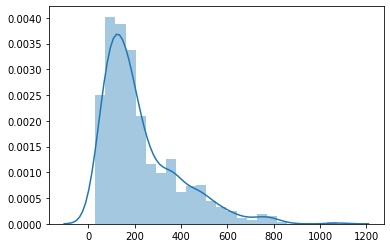

In [131]:
sns.distplot([len(s) for s in sequences_chords])

## Code for Computing Mutual Information Statistics

See "Critical Behaviour in Physics and Probabilistic Formal Languages" (Lin & Tenmark, 2017), Appendix D.

In [93]:
# estimate the entropy of a distribution from samples
# expects a list or numpy array of samples
def est_entropy(samples):
    N = len(samples)
    counter = Counter(samples)
    #counts = np.fromiter(Counter(samples).values(), dtype=int)
    return np.log2(N) - ((sum([counts * scipy.special.psi(counts) for (key, counts) in counter.items()])) / N)

# estimate the mutual information between two variable from sample pairs
# expects an array with two columns
def est_mi(pairs):
    X = pairs[:,0]
    Y = pairs[:,1]
    pairs_tup = list(map(tuple,pairs))
    sX = est_entropy(X)
    sY = est_entropy(Y)
    sP = est_entropy(pairs_tup)
    #print(sX)
    #print(sY)
    #print(sP)
    return sX + sY - sP

def est_mi_corr(pairs, shuffled_pairs):
    return est_mi(pairs) - est_mi(shuffled_pairs)

In [94]:
def get_pairs(sequence, distance):
    return np.column_stack([sequence[:-distance], sequence[distance:]])

def seqs_pairs(sequences, distance):
    print(distance)
    return np.concatenate([get_pairs(seq, distance) for seq in sequences])

In [95]:
def collect_mi(seqs):
    maxdist = 101 #max(map(len, seqs))
    shuffled = [np.random.permutation(s) for s in seqs]
    values = [(dist, est_mi_corr(seqs_pairs(seqs, dist), seqs_pairs(shuffled, dist))) for dist in range(1,maxdist)]
    return pd.DataFrame.from_records(values, columns=["dist", "mi"])

In [96]:
ps = pairs_from_sequences(sequences_essen_pitch, 498)
print(ps)
est_mi(ps)

498
[['E5' 'B4']
 ['G5' 'A4']
 ['E5' 'F#4']]


1.4955114989560223

# Exercise 1: Plot Mutual Information

Compute the mutual information for all distances and plot them.

In [105]:
mi_essen_pitch = collect_mi(sequences_essen_pitch)

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100


[None, None]

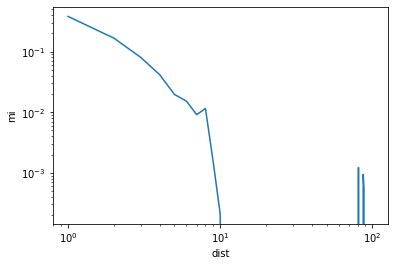

In [114]:
plot = sns.lineplot(data=mi_essen_pitch, x="dist", y="mi")
plot.set(xscale="log", yscale="log")

In [107]:
mi_essen_int = collect_mi(sequences_essen_int)

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100


[None, None]

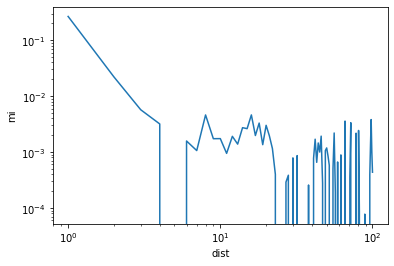

In [134]:
plot = sns.lineplot(data=mi_essen_int, x="dist", y="mi")
plot.set(xscale="log", yscale="log")

In [132]:
mi_chords = collect_mi(sequences_chords)

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100


[None, None]

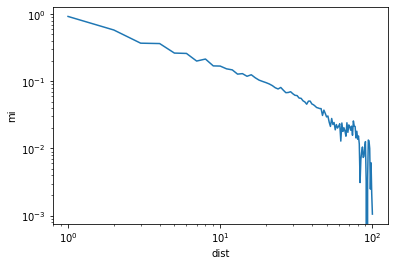

In [163]:
plot = sns.lineplot(data=mi_chords, x="dist", y="mi")
plot.set(xscale="log", yscale="log")

# Exercise 2: Markov Model

For the following exercise use either the pitch sequences or the interval sequences.

1. Compute bigrams, count their occurrences, and look at the top 20 bigrams.
1. Use the sequences to train a 1st-order markov model.
1. Use the model to generate new sequences of length 100.
1. Compute the mutual information statistics on these sequences. What do you observe?

In [135]:
# Compute bigrams

bigrams = map(tuple, pairs_from_sequences(sequences_chords, 1))
counts = Counter(bigrams)
counts.most_common(20)

1


[(('V7', 'I'), 2997),
 (('V', 'I'), 2246),
 (('V', 'i'), 1694),
 (('V(64)', 'V7'), 1326),
 (('I', 'I6'), 1198),
 (('V7', 'i'), 1175),
 (('I', 'V'), 1099),
 (('V65', 'I'), 1054),
 (('V2', 'I6'), 1052),
 (('I', 'V7'), 1010),
 (('V(4)', 'V'), 925),
 (('i', 'V'), 894),
 (('V(64)', 'V'), 873),
 (('I', 'IV'), 861),
 (('I6', 'I'), 748),
 (('I', 'I'), 721),
 (('V', 'V7'), 720),
 (('I6', 'IV'), 717),
 (('I', 'V43'), 645),
 (('V43', 'I'), 629)]

In [136]:
# Compute transition table

transitions = dict()
for ((x1, x2), count) in counts.items():
    if not (x1 in transitions):
        transitions[x1] = dict()
    transitions[x1][x2] = count

In [137]:
def normalize_dict(dictionary):
    S = sum(dictionary.values())
    return dict([(k, v/S) for (k, v) in dictionary.items()])

In [138]:
transitions_norm = dict([(x1, normalize_dict(counts)) for (x1, counts) in transitions.items()])

In [139]:
def next_note(trans, note):
    dist = trans[note]
    items = dist.items()
    candidates = [note for (note, prob) in items]
    probs = [prob for (note, prob) in items]
    return np.random.choice(candidates, p=probs)

In [140]:
def sample_piece(trans, length):
    note = np.random.choice(list(trans.keys()))
    notes = [note]
    for i in range(1, length):
        note = next_note(trans, note)
        notes.append(note)
    return notes

In [145]:
generated = [sample_piece(transitions_norm, 200) for i in range(0,500)]

In [144]:
generated[0]

['iii43',
 'vi',
 'IV',
 'V43',
 'V6',
 'I',
 'vi',
 'V6',
 'i',
 'V',
 'V7',
 '#viio6/ii',
 'ii6',
 'I',
 'I',
 'V7',
 'i(9)',
 'i',
 'v',
 'VI6(2)',
 'VI6',
 'iv64',
 'iio64/iv',
 'iv64',
 '#viio7',
 'V7',
 'viio7/V',
 'V7',
 'V(64)',
 'i',
 'V7',
 'III6',
 '#iv%2(9)/III',
 'V43/III',
 'i6',
 'V',
 'I6',
 'V(6)',
 'V(64)',
 'V',
 '#viio7',
 'iv6(+6)',
 'iv6',
 'V(4)',
 'V',
 'V2',
 'I6',
 'ii6',
 'V(64)',
 'V7',
 'I6',
 'IV',
 'ii7(9)',
 'IV',
 'ii6',
 'I64',
 'I',
 'V43',
 'I6',
 'IV',
 'I(4)',
 'I',
 'ii6',
 'V7/vi',
 'V65/vi',
 'vi',
 'vii%7/V',
 'V',
 'V2',
 'i6',
 'V43',
 'I',
 'I6',
 'V2',
 '#viio6',
 'i6',
 'i64',
 '#viio43/iv',
 'V2/iv',
 'iv6',
 'V',
 'ii',
 'viio43/V',
 'V6',
 'I',
 'V/ii',
 'ii',
 'V',
 'V6(9)',
 'V6',
 'V',
 'vi6',
 'i6',
 'V7/V',
 'V',
 'i',
 'V6',
 'I',
 'viio6',
 'I',
 'V7',
 'V(64)',
 'V7',
 'i',
 'ii%65',
 'V(64)',
 'V7',
 'i',
 'V',
 'V7']

In [160]:
mi_generated = collect_mi(generated)

1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100


[None, None]

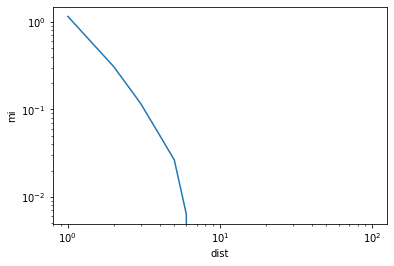

In [161]:
plot = sns.lineplot(data=mi_generated, x="dist", y="mi")
plot.set(xscale="log", yscale="log")

In [190]:
exponential = lambda x, a, b, c: a * (np.e ** (-x*b)) + c
powerlaw = lambda x, a, b, c: a * (x ** b) + c

In [204]:
def fit_models(data):
    out = pd.DataFrame(data)
    popt_exp, pcov_exp = scipy.optimize.curve_fit(exponential, data["dist"], data["mi"])
    out["exp"] = exponential(data["dist"], popt_exp[0], popt_exp[1], popt_exp[2])
    loss_exp = sum((out["mi"] - out["exp"]) ** 2)

    popt_pow, pcov_pow = scipy.optimize.curve_fit(powerlaw, data["dist"], data["mi"], p0=[1.0,-2.0,0.0])
    out["pow"] = powerlaw(data["dist"], popt_pow[0], popt_pow[1], popt_pow[2])
    loss_pow = sum((out["mi"] - out["pow"]) ** 2)
    
    return out, loss_exp, loss_pow

In [207]:
out_chords, le_chords, lp_chords = fit_models(mi_chords)
print("loss exp:", le_chords)
print("loss pow:", lp_chords)

loss exp: 0.1223438605937934
loss pow: 0.0069088571343413835


[None, None]

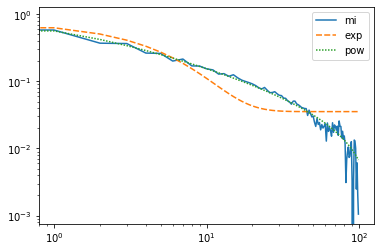

In [208]:
plot = sns.lineplot(data=out_chords[["mi", "exp", "pow"]])
plot.set(xscale="log", yscale="log")

In [209]:
out_gen, le_gen, lp_gen = fit_models(mi_generated)
print("loss exp:", le_gen)
print("loss pow:", lp_gen)

loss exp: 0.007794994734287954
loss pow: 0.00420858007877223


[None, None]

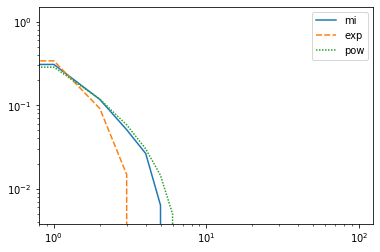

In [212]:
plot = sns.lineplot(data=out_gen[["mi", "exp", "pow"]])
plot.set(xscale="log", yscale="log")